In [54]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

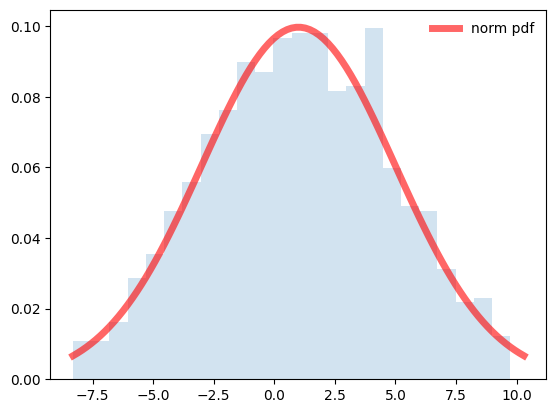

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 1.022275367523162
Sample variance: 16.476357660733985


In [55]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

**Note:** This code creates and visualizes a normal distribution, generates random samples from that distribution, plots a histogram of the samples, and prints various statistics about both the distribution and the samples.

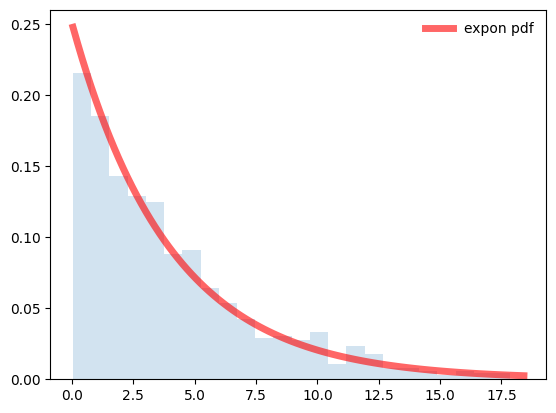

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.234977912545618
Sample variance: 17.5543759437016


In [56]:
#Exponential
#here goes your code

rv_expon = expon(scale = 4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))
#hint: expon

**Note:** The provided code creates an exponential distribution with a scale parameter of 4. It then generates 100 evenly spaced values `x` between the 1st and 99th percentiles of the distribution. Subsequently, a plot of the probability density function (PDF) of the exponential distribution is made using the generated `x` values.


Following that, the code generates 1000 random samples (`r`) from the exponential distribution and plots a histogram of the samples. Additionally, it prints various statistics of the distribution, including the mean and variance, as well as the mean and variance of the generated samples.

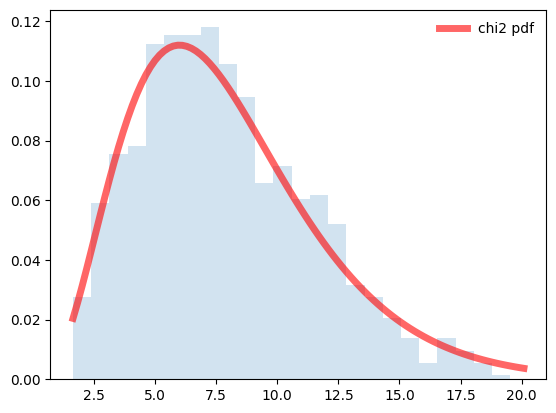

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.014977320411429
Sample variance: 15.410511181376135


In [57]:
#chi2
#here goes your code

rv_chi2 = chi2(df=8)

x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: chi2

**Note:** This code utilizes the chi-squared distribution with 8 degrees of freedom. It plots the probability density function and a histogram of 1000 random samples drawn from the distribution. The resulting plot includes a legend, and the code prints various statistics, such as the mean and variance, for both the distribution and the generated samples.

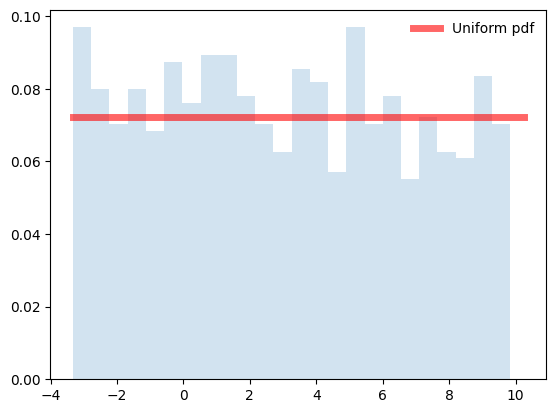

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.243693660004052
Sample variance: 15.809650197735518


In [58]:
#uniform

#here goes your code

dist = uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))

x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
r = dist.rvs(size=1000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, dist.pdf(x), 'r-', lw=5, alpha=0.6, label='Uniform pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])
ax.legend(loc='best', frameon=False)
plt.show()

print(f"Distribution mean: {dist.stats(moments='m')}")
print(f"Distribution variance: {dist.stats(moments='v')}")
print(f"Sample mean: {np.mean(r)}")
print(f"Sample variance: {np.var(r)}")

#hint: uniform

**Note:** This code utilizes a uniform distribution with a specified range. It plots the probability density function and a histogram of 1000 random samples drawn from the distribution. The resulting plot includes a legend, and the code prints various statistics, such as the mean and variance, for both the distribution and the generated samples.

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

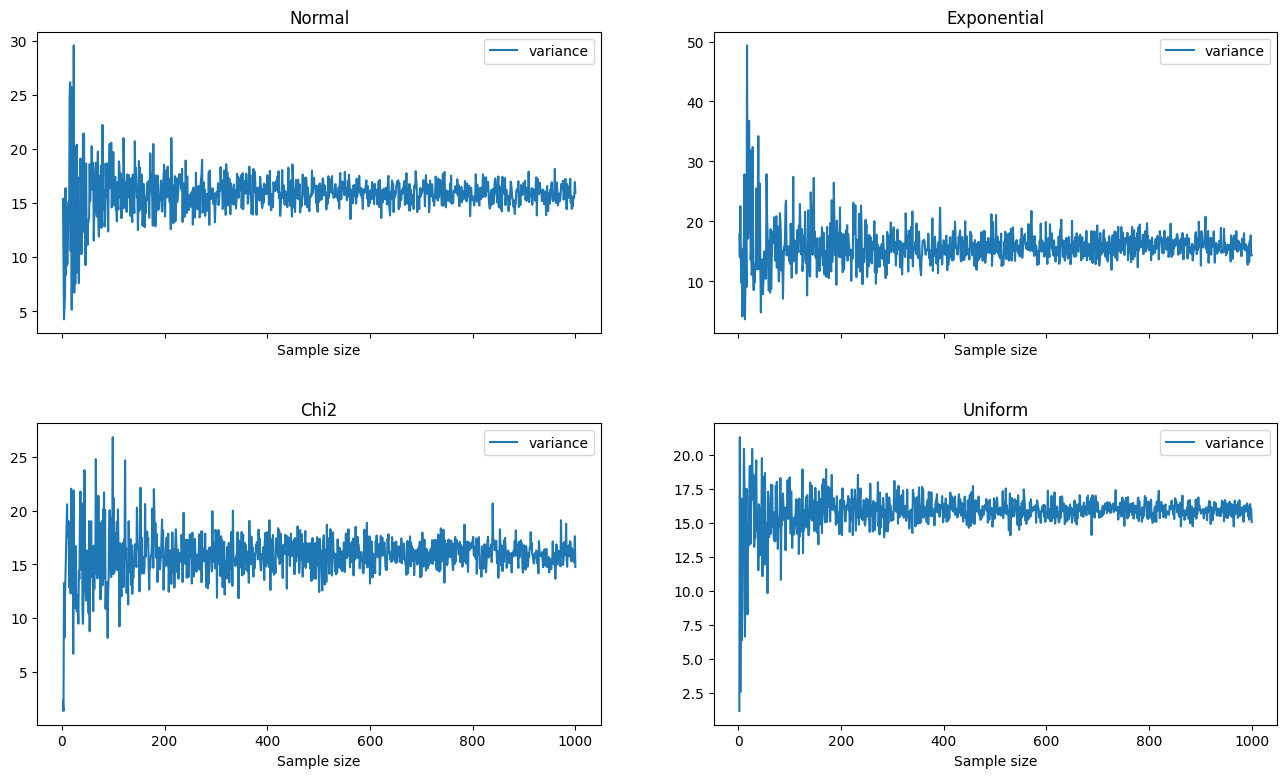

In [59]:
#here goes your code


names = ['Normal', 'Exponential', 'Chi2', 'Uniform']
distributions = [norm(loc=1, scale=4), expon(scale=4), chi2(df=8), uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))]


def compute_stats(distribution, sample_size):
    samples = distribution.rvs(size=sample_size)
    return np.var(samples), np.mean(samples)


statistics = {name: {'variances': [], 'means': []} for name in names}


sample_size_range = (2, 1001)
for size in range(*sample_size_range):
    for dist, name in zip(distributions, names):
        variance, mean = compute_stats(dist, size)
        statistics[name]['variances'].append(variance)
        statistics[name]['means'].append(mean)


fig, axs = plt.subplots(2, 2, figsize=(16, 9), sharex=True)
fig.subplots_adjust(hspace=0.3)

for ax, (name, dist_stats) in zip(axs.flatten(), statistics.items()):
    ax.set_title(name)
    ax.set_xlabel('Sample size')
    ax.plot(range(*sample_size_range), dist_stats['variances'], label='variance')
    ax.legend()

plt.show()


**Note:** The provided code systematically compares the variance of random samples drawn from four different probability distributions (Normal, Exponential, Chi-squared, and Uniform) across a range of increasing sample sizes. Each distribution is defined with specific parameters, and a function computes the variance and mean of random samples for different sample sizes. 

The results are organized into a dictionary, and the variance trends are visualized through a 2x2 subplot grid, where each subplot represents a different distribution. This analysis offers insights into how the variance of samples evolves with varying sample sizes across diverse probability distributions.

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

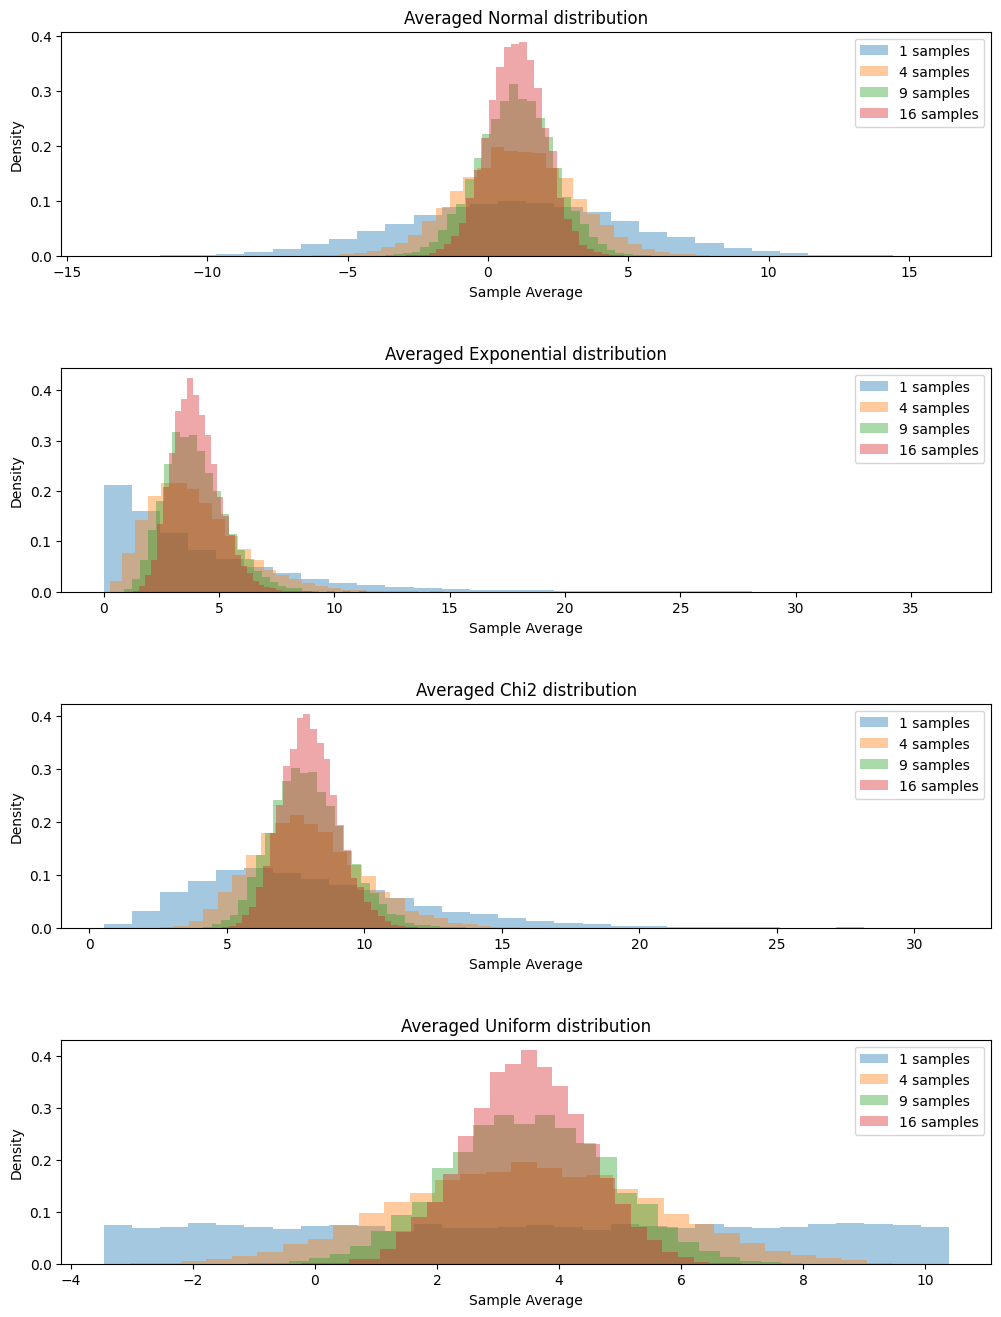

In [60]:
#here goes your code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, chi2, uniform

names = ['Normal', 'Exponential', 'Chi2', 'Uniform']
distributions = [norm(loc=1, scale=4), expon(scale=4), chi2(df=8), uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))]


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)

for idx, (dist, dist_name) in enumerate(zip(distributions, names)):
    for N in [1, 4, 9, 16]:
        averages = [np.mean(dist.rvs(size=N)) for _ in range(10000)]
        axes[idx].hist(averages, density=True, bins=30, alpha=0.4, label=f'{N} samples')
    
    axes[idx].legend()
    axes[idx].set_title(f'Averaged {dist_name} distribution')
    axes[idx].set_xlabel('Sample Average')
    axes[idx].set_ylabel('Density')

plt.show()


**Note:** This code visually illustrates the Central Limit Theorem (CLT) by generating histograms of sample averages from four distinct probability distributions (Normal, Exponential, Chi-squared, and Uniform).

*The CLT states that, regardless of the original distribution's shape, the distribution of sample averages approaches a normal distribution as the sample size increases.*

The code utilizes matplotlib and numpy to create a subplot grid, with each row corresponding to a different distribution. For each distribution, histograms of sample averages are plotted for various sample sizes (1, 4, 9, 16). The resulting visualizations depict how the distribution of sample averages converges towards a normal distribution, confirming the fundamental principle of the Central Limit Theorem.

The plots provide an intuitive insight into how sample size impacts the shape of the distribution of sample averages, offering a practical illustration of the CLT in action.

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

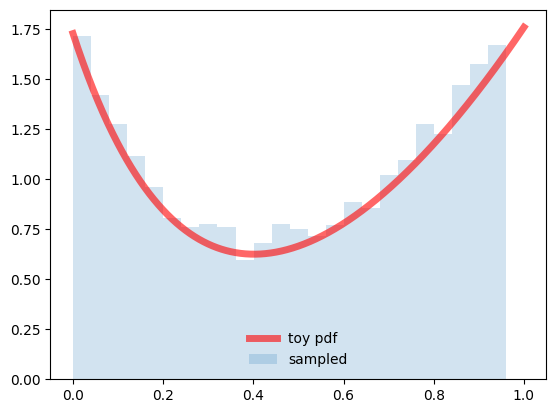

In [61]:


def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    #here goes your code
    samples = []
    M = max(dist)
    while len(samples) < size:
        u = uniform.rvs(0, M)
        t = uniform.rvs(0, 1)
        if toy_dist(t) > u:
            samples.append(t)
    return samples

samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()



**Note:** This code implements accept-rejection sampling on a non-standard probability distribution represented by the `toy_dist`` function. 

1. **Probability Distribution Function (PDF):**
   - The function `toy_dist(x)` defines a specific non-standard probability distribution.

2. **Accept-Rejection Sampling:**
   - The function `accept_rejection_sampling` generates 10,000 samples using accept-rejection sampling, comparing each sample with the scaled `toy_dist`.

3. **Generate and Plot Samples:**
   - The resulting plot showcases the original probability distribution (`toy pdf`) alongside the histogram of accept-rejected samples.

In summary, the code illustrates the effectiveness of accept-rejection sampling in generating random samples from non-standard probability distributions. The plot visually compares the original distribution with the sampled histogram.

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

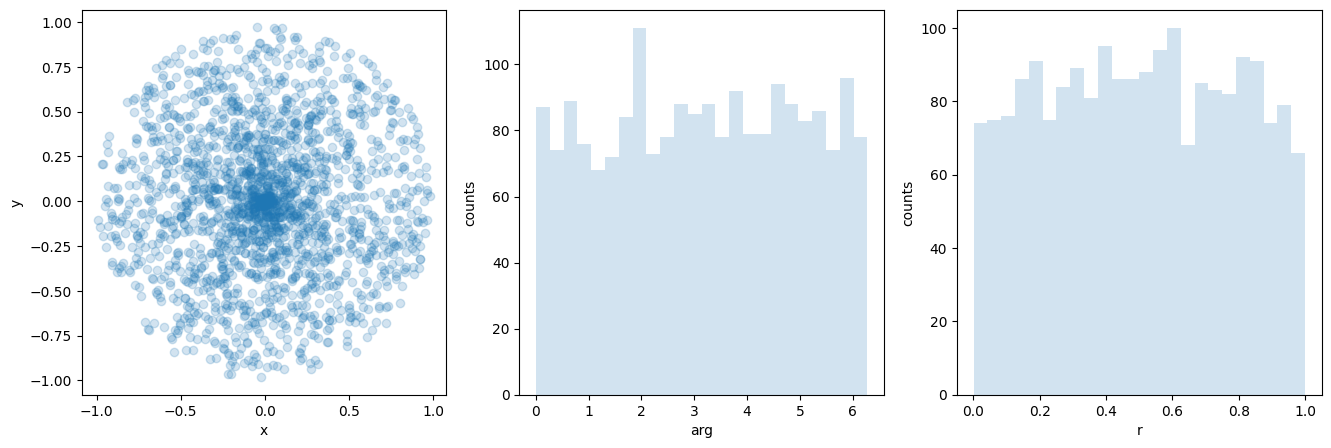

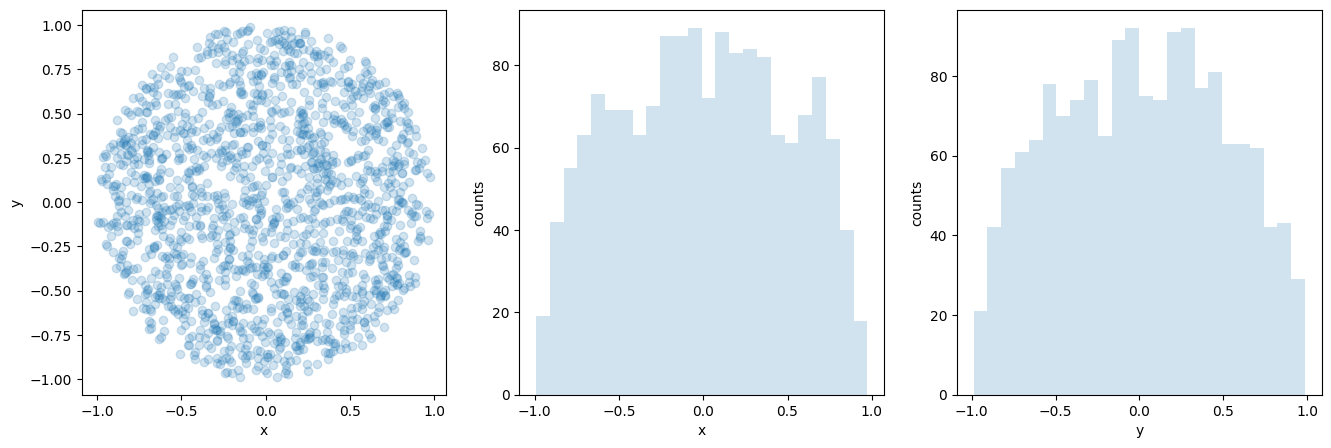

In [62]:
#Version1
#here goes your code
def create_polar_coordinates(num_points):
    uniform_radius = uniform(loc=0, scale=1)
    uniform_argument = uniform(loc=0, scale=2*np.pi)
    radius = uniform_radius.rvs(num_points)
    argument = uniform_argument.rvs(num_points)
    x = radius * np.sin(argument)
    y = radius * np.cos(argument)

    return x, y, radius, argument

x, y, radius, argument = create_polar_coordinates(2000)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 3, 2)
plt.hist(argument, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('arg')
plt.ylabel('counts')
plt.subplot(1, 3, 3)
plt.hist(radius, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('r')
plt.ylabel('counts')

plt.show()


#Version2
#here goes your code

def generate_points(num_points):
    dist = uniform(loc=-1, scale=2)
    x, y = [dist.rvs(num_points) for _ in range(2)]
    points = [(x_, y_) for x_, y_ in zip(x, y) if np.sqrt(x_**2 + y_**2) < 1]
    
    return zip(*points)

x, y = generate_points(2000)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 3, 2)
plt.hist(x, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('x')
plt.ylabel('counts')
plt.subplot(1, 3, 3)
plt.hist(y, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('y')
plt.ylabel('counts')

plt.show()


**note:** ***In the 1st Version*** code generates and visualizes polar coordinates for 2000 points. It includes a function, `create_polar_coordinates`, that uses uniform distributions to create random polar coordinates. These coordinates are then transformed into Cartesian coordinates (`x` and `y`). The visualizations consist of a scatter plot showing the points in Cartesian space and a histogram depicting the distribution of argument values (`arg`). The code provides insights into the spatial arrangement of points and the concentration of argument values in the polar coordinate system. Overall, it serves as an illustrative exploration of polar coordinate visualization.


***In the 2nd Version*** code generates 2000 points randomly distributed within the unit circle and provides visualizations. The `generate_points` function utilizes a uniform distribution to create x and y values, ensuring that points lie within the unit circle. The resulting scatter plot offers a clear visualization of the point distribution. Additionally, histograms of x and y coordinates provide insights into their individual distributions. Overall, this code serves as a simple and informative exploration of points within the unit circle.

Here goes your explanation




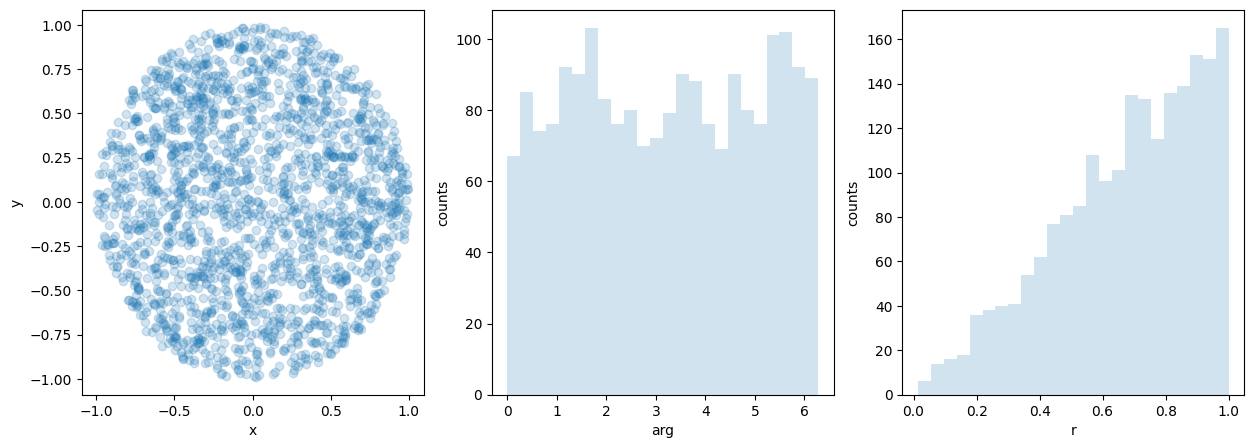

In [63]:
#Version3
#here goes your code

radius_var = uniform(0, 1)
argument_var = uniform(0, 2 * np.pi)
radius = np.sqrt(1 - radius_var.rvs(2000))
argument = argument_var.rvs(2000)


x = radius * np.sin(argument)
y = radius * np.cos(argument)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 3, 2)
plt.hist(argument, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('arg')
plt.ylabel('counts')
plt.subplot(1, 3, 3)
plt.hist(radius, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('r')
plt.ylabel('counts')

plt.show()


**Note:** ***In 3rd Version*** code creates 2000 points by generating random polar coordinates and converting them to Cartesian coordinates for visualization. Using uniform distributions, it ensures a varied spread of points in both radial and angular dimensions. The resulting scatter plot provides a clear picture of how these points are distributed in Cartesian space. The accompanying histograms give a straightforward view of the spread of argument values and radial distances. Overall, this code offers a straightforward exploration of the characteristics and spatial distribution of points in both polar and Cartesian coordinate systems.

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

**Note:** In a Dirichlet problem, the goal is to find a solution to a PDE within a specified domain, subject to prescribed values, named Dirichlet boundary conditions, on the boundary of that domain. 

In [64]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

**Note:** A 2D array (plane) with dimensions S x S and set initial values for its boundaries are initialized. This array appears to represent a grid or mesh, and initial values along the edges of the grid are described.


- S is a variable representing the size of the grid.
- plane is a 2D array filled with zeros, representing the main grid where the solution will be computed.
- the values along the edges of the grid (plane[0], plane[-1], plane[:,0], and plane[:,-1]) are set based on cosine and linear functions.

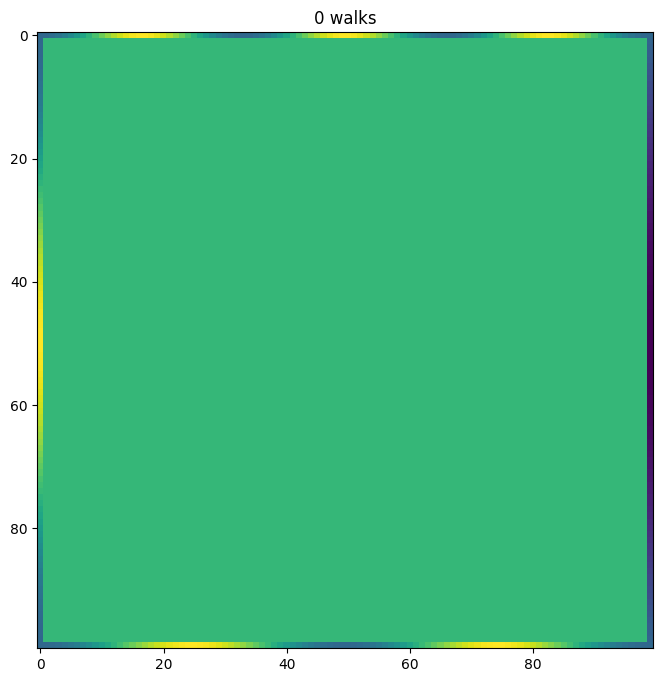

In [65]:
plt.figure(figsize=(8,8))
plt.title("0 walks")
plt.imshow(plane)

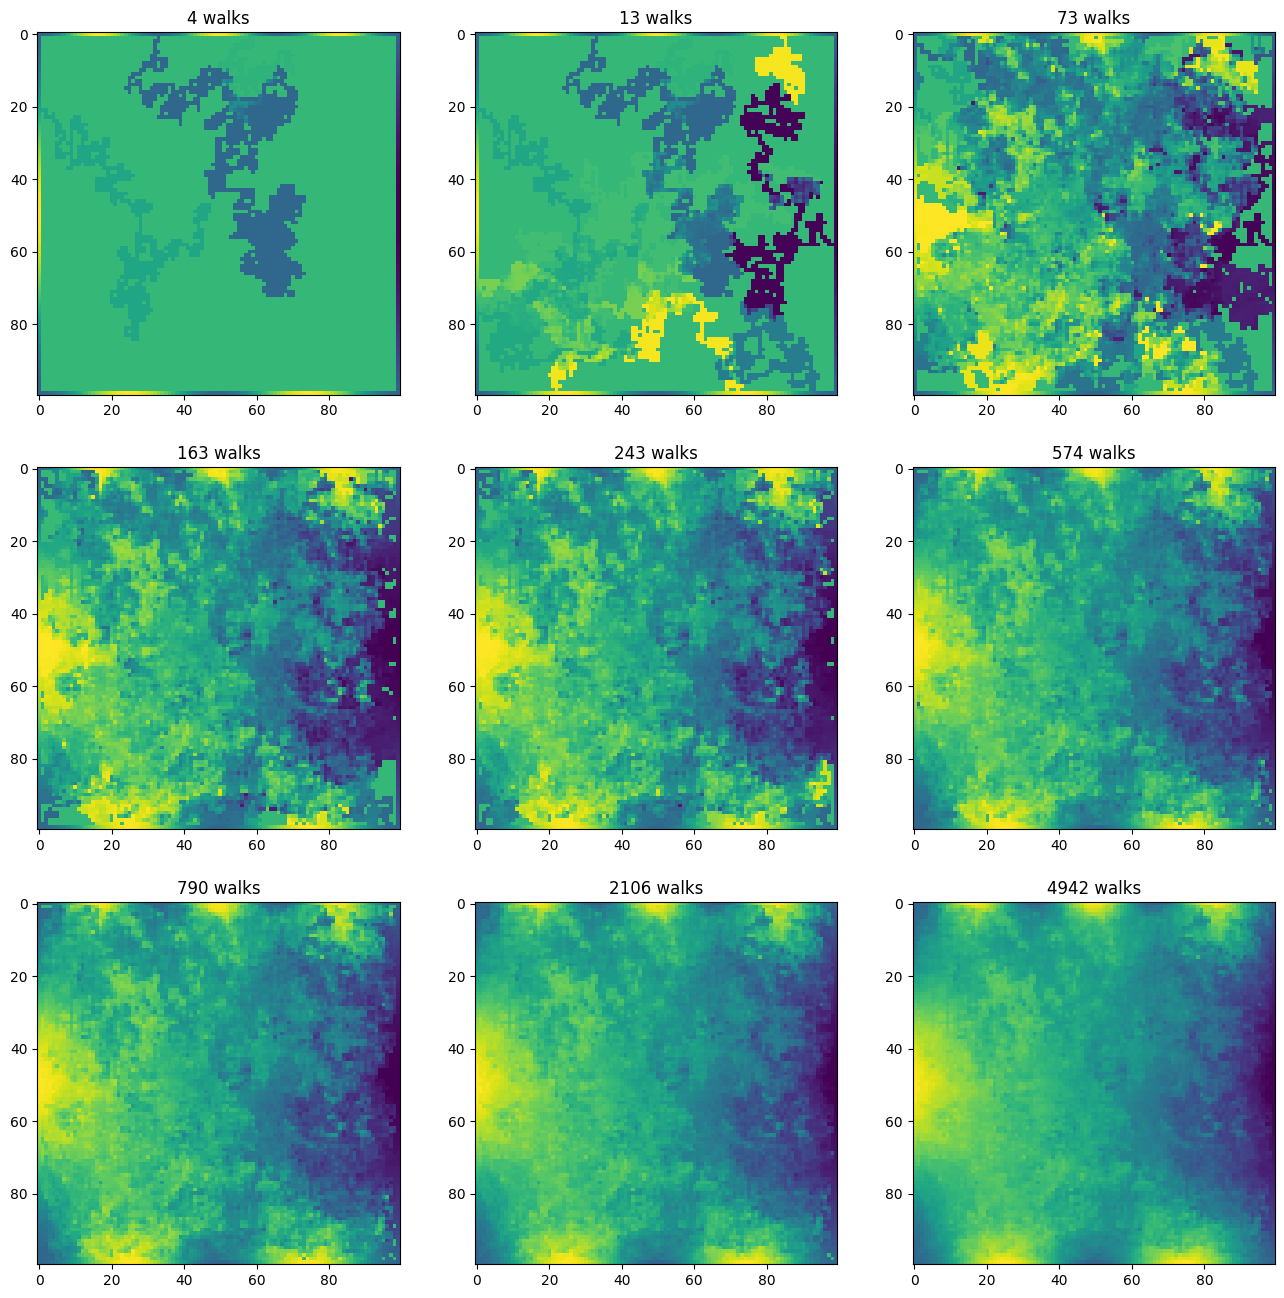

In [66]:
import random
import copy

np.random.seed(0)

directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]

fig, axs = plt.subplots(3, 3, figsize=(16, 16))
sub = 0

planes = [copy.deepcopy(plane)]

precision = 1e-7
relative_change_intervals = np.geomspace(precision, 1e-1, num=10, endpoint=True)[::-1]
intervals_iter = iter(relative_change_intervals)
interval = next(intervals_iter)

i = 0
while sub < 9:
    i += 1
    start_x, start_y = np.random.randint(1, S-1, 2)
    moves = []
    plane_counts_old = copy.deepcopy(plane_counts)
    while all([start_x > 0, start_x < S - 1, start_y > 0, start_y < S - 1]):
        plane_counts[start_y][start_x] += 1
        moves.append([start_y, start_x])
        direction = random.choice(directions)
        start_x, start_y = start_x + direction[1], start_y + direction[0]
    planes.append(copy.deepcopy(planes[-1]))
    for move in moves:
        planes[-1][move[0]][move[1]] = ((plane_counts_old[move[0]][move[1]] * planes[-2][move[0]][move[1]]) + planes[-1][start_y][start_x]) / (plane_counts_old[move[0]][move[1]] + 1)

    relative_change = np.linalg.norm(planes[-1]-planes[-2]) / np.linalg.norm(planes[-1])
    if relative_change < precision * 1e-10: continue
    if relative_change <= interval:
        axs.flat[sub].imshow(planes[-1])
        axs.flat[sub].set_title(f'{len(planes)} walks')
        sub += 1
        interval = next(intervals_iter)
plt.show()

**Note:** This code performs a Monte Carlo simulation using a random walk to address a computational problem. I have set up initial conditions and parameters and created a grid and counters for grid points and then stablished a list to track evolving states.


Afterwards, I executed a random walk from a random grid position until reaching the boundary, updated counters to monitor grid point visits and then adjusted the solution state based on the walk path.


Tracked the relative change between consecutive solutions and continued the simulation until the relative change falls below a specified precision. And at the end,intermediate solutions in a 3x3 grid is displayed. Each subplot illustrates the evolving solution during different phases of the random walk.

The code models a diffusion or heat conduction process, utilizing random walks for simulation and offering visual insights into the solution's progression.

In [67]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()

Traceback (most recent call last):
  File "/home/viktoryia/.local/lib/python3.11/site-packages/matplotlib/cbook.py", line 298, in process
    func(*args, **kwargs)
  File "/home/viktoryia/.local/lib/python3.11/site-packages/matplotlib/animation.py", line 912, in _start
    self._init_draw()
  File "/home/viktoryia/.local/lib/python3.11/site-packages/matplotlib/animation.py", line 1749, in _init_draw
    self._draw_frame(frame_data)
  File "/home/viktoryia/.local/lib/python3.11/site-packages/matplotlib/animation.py", line 1768, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_45763/1951036766.py", line 17, in updatefig
    plt.title("{0} walks".format(walks[j]))
                                 ^^^^^
NameError: name 'walks' is not defined
